## Responsible AI 

***

## Project Description

A large bank has asked us to evaluate the marketing algorithms they use for retail banking. Their sophisticated phone marketing algorithm predicts whether a certain person will subscribe to a term deposit or not. Based on that assessment, the bank then optimises its phone calling strategy. With this algorithm, the bank has been successful in predicting which clients are more likely to subscribe to their term deposits. 

Management is now interested in finding out how a classification model can lead to certain decision-making processes. 

## Data Dictionary

Input variables:
### bank client data:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

### related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## Summary

Number of employees and age has influence on who will subscribe to term deposit

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import sklearn

import shap
import statsmodels.api as sm

import datetime
from datetime import datetime, timedelta

import scipy.stats

import pandas_profiling
from pandas_profiling import ProfileReport

#import graphviz

#import xgboost as xgb
#from xgboost import XGBClassifier, XGBRegressor
#from xgboost import to_graphviz, plot_importance

#from sklearn.experimental import enable_hist_gradient_boosting
#from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, LogisticRegression, Ridge
#from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier, ExtraTreesRegressor
#from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor, HistGradientBoostingClassifier, HistGradientBoostingRegressor


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)


#from sklearn.pipeline import Pipeline
#from sklearn.model_selection import RepeatedStratifiedKFold
#from sklearn.feature_selection import RFE, RFECV, SelectKBest, f_classif, f_regression, chi2

from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import export_graphviz, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score


#from tpot import TPOTClassifier, TPOTRegressor
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

# import pickle
# from pickle import dump, load

# Use Folium library to plot values on a map.
#import folium

# Use Feature-Engine library

#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce


from pycaret.classification import *
#from pycaret.clustering import *
#from pycaret.regression import *

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)


random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("bank-additional-full.csv", sep=';')

In [3]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188.00,41188.00,41188.00,41188.00,41188,41188.00,41188.00,41188.00,41188.00,41188.00,41188
unique,nan,12,4,8,3,3,3,2,10,5,nan,nan,nan,nan,3,nan,nan,nan,nan,nan,2
top,nan,admin.,married,university.degree,no,yes,no,cellular,may,thu,nan,nan,nan,nan,nonexistent,nan,nan,nan,nan,nan,no
freq,nan,10422,24928,12168,32588,21576,33950,26144,13769,8623,nan,nan,nan,nan,35563,nan,nan,nan,nan,nan,36548
mean,40.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.29,2.57,962.48,0.17,NaN,0.08,93.58,-40.50,3.62,5167.04,NaN
std,10.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.28,2.77,186.91,0.49,NaN,1.57,0.58,4.63,1.73,72.25,NaN
min,17.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,1.00,0.00,0.00,NaN,-3.40,92.20,-50.80,0.63,4963.60,NaN
25%,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.00,1.00,999.00,0.00,NaN,-1.80,93.08,-42.70,1.34,5099.10,NaN
50%,38.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.00,2.00,999.00,0.00,NaN,1.10,93.75,-41.80,4.86,5191.00,NaN
75%,47.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319.00,3.00,999.00,0.00,NaN,1.40,93.99,-36.40,4.96,5228.10,NaN


In [6]:
df.shape

(41188, 21)

In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype='object')

### Groupby Function

In [8]:
df.groupby(by='y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.91,220.84,2.63,984.11,0.13,0.25,93.60,-40.59,3.81,5176.17
yes,40.91,553.19,2.05,792.04,0.49,-1.23,93.35,-39.79,2.12,5095.12


In [9]:
df.groupby(by='y').count()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,,,,,,,,,,,
no,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548
yes,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640


In [10]:
df.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

### Pandas-Profiling Reports

In [11]:
profile = ProfileReport(df=df, title='Bank Marketing Report', minimal=True)

In [12]:
profile.to_notebook_iframe()

In [13]:
profile.to_file("your_report.html")

## Data Visualization

### Univariate Data Exploration

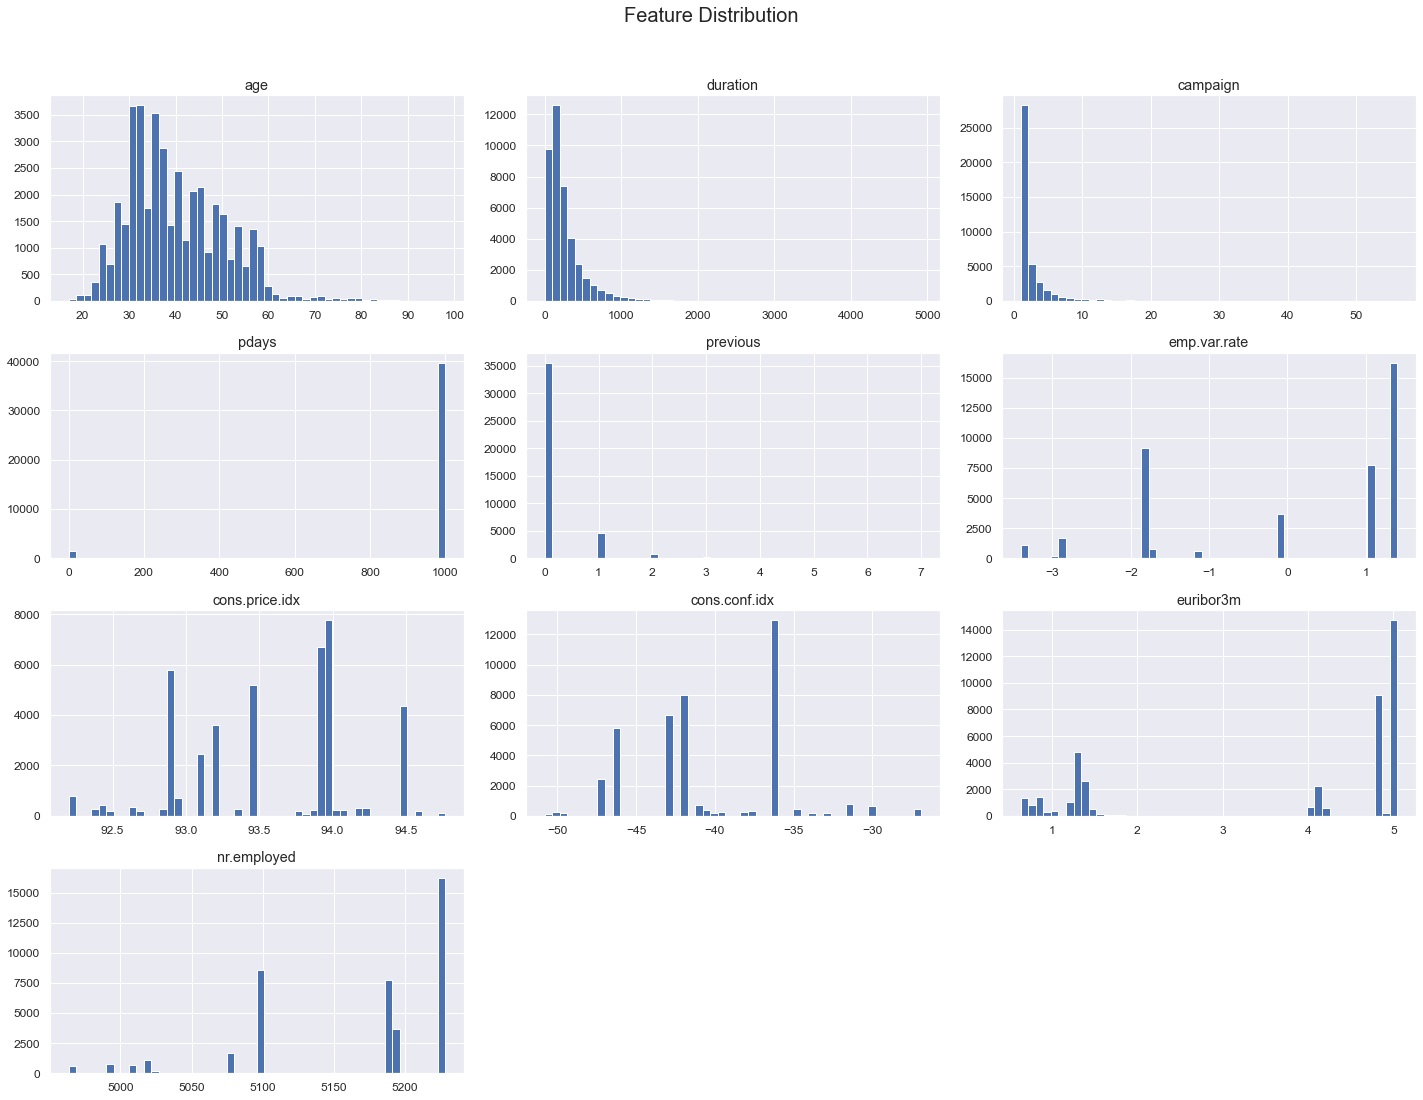

In [14]:
df.hist(bins=50, figsize=(20,15))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

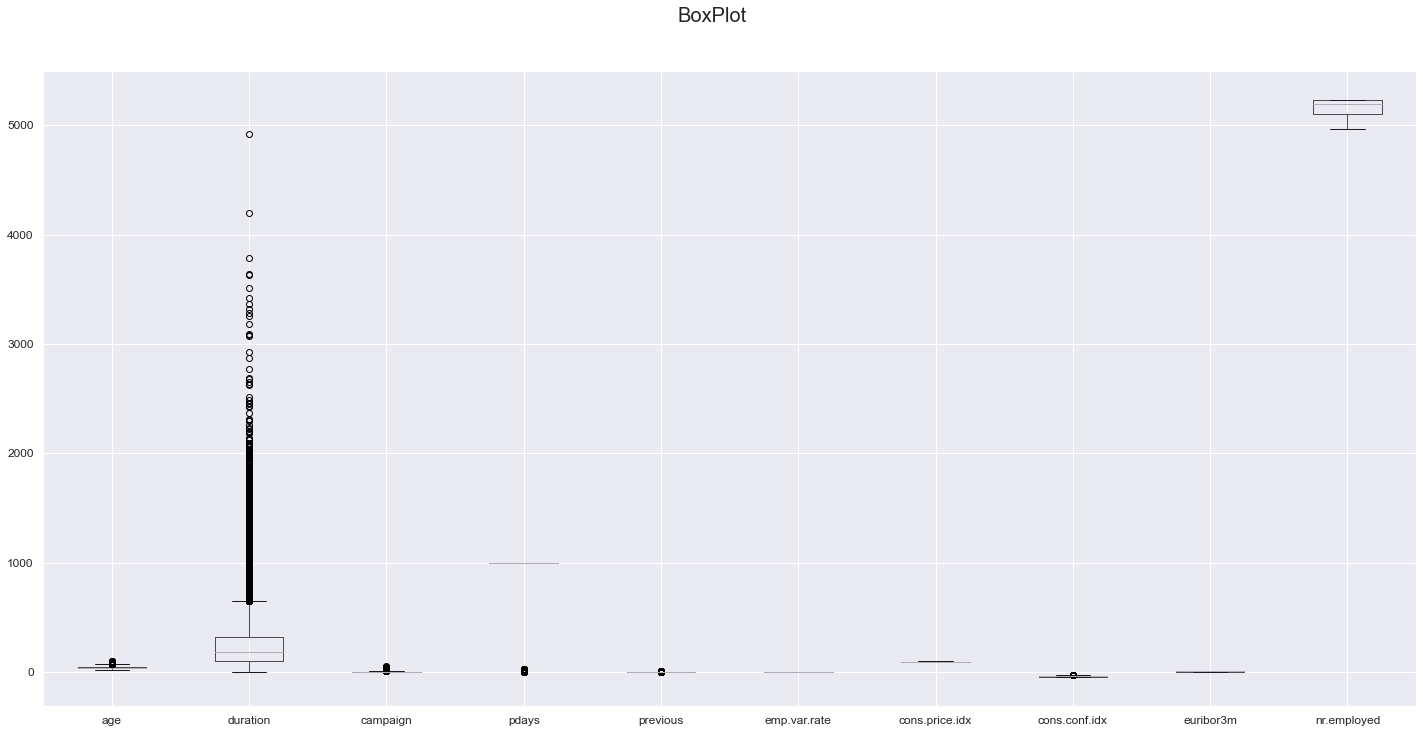

In [15]:
df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

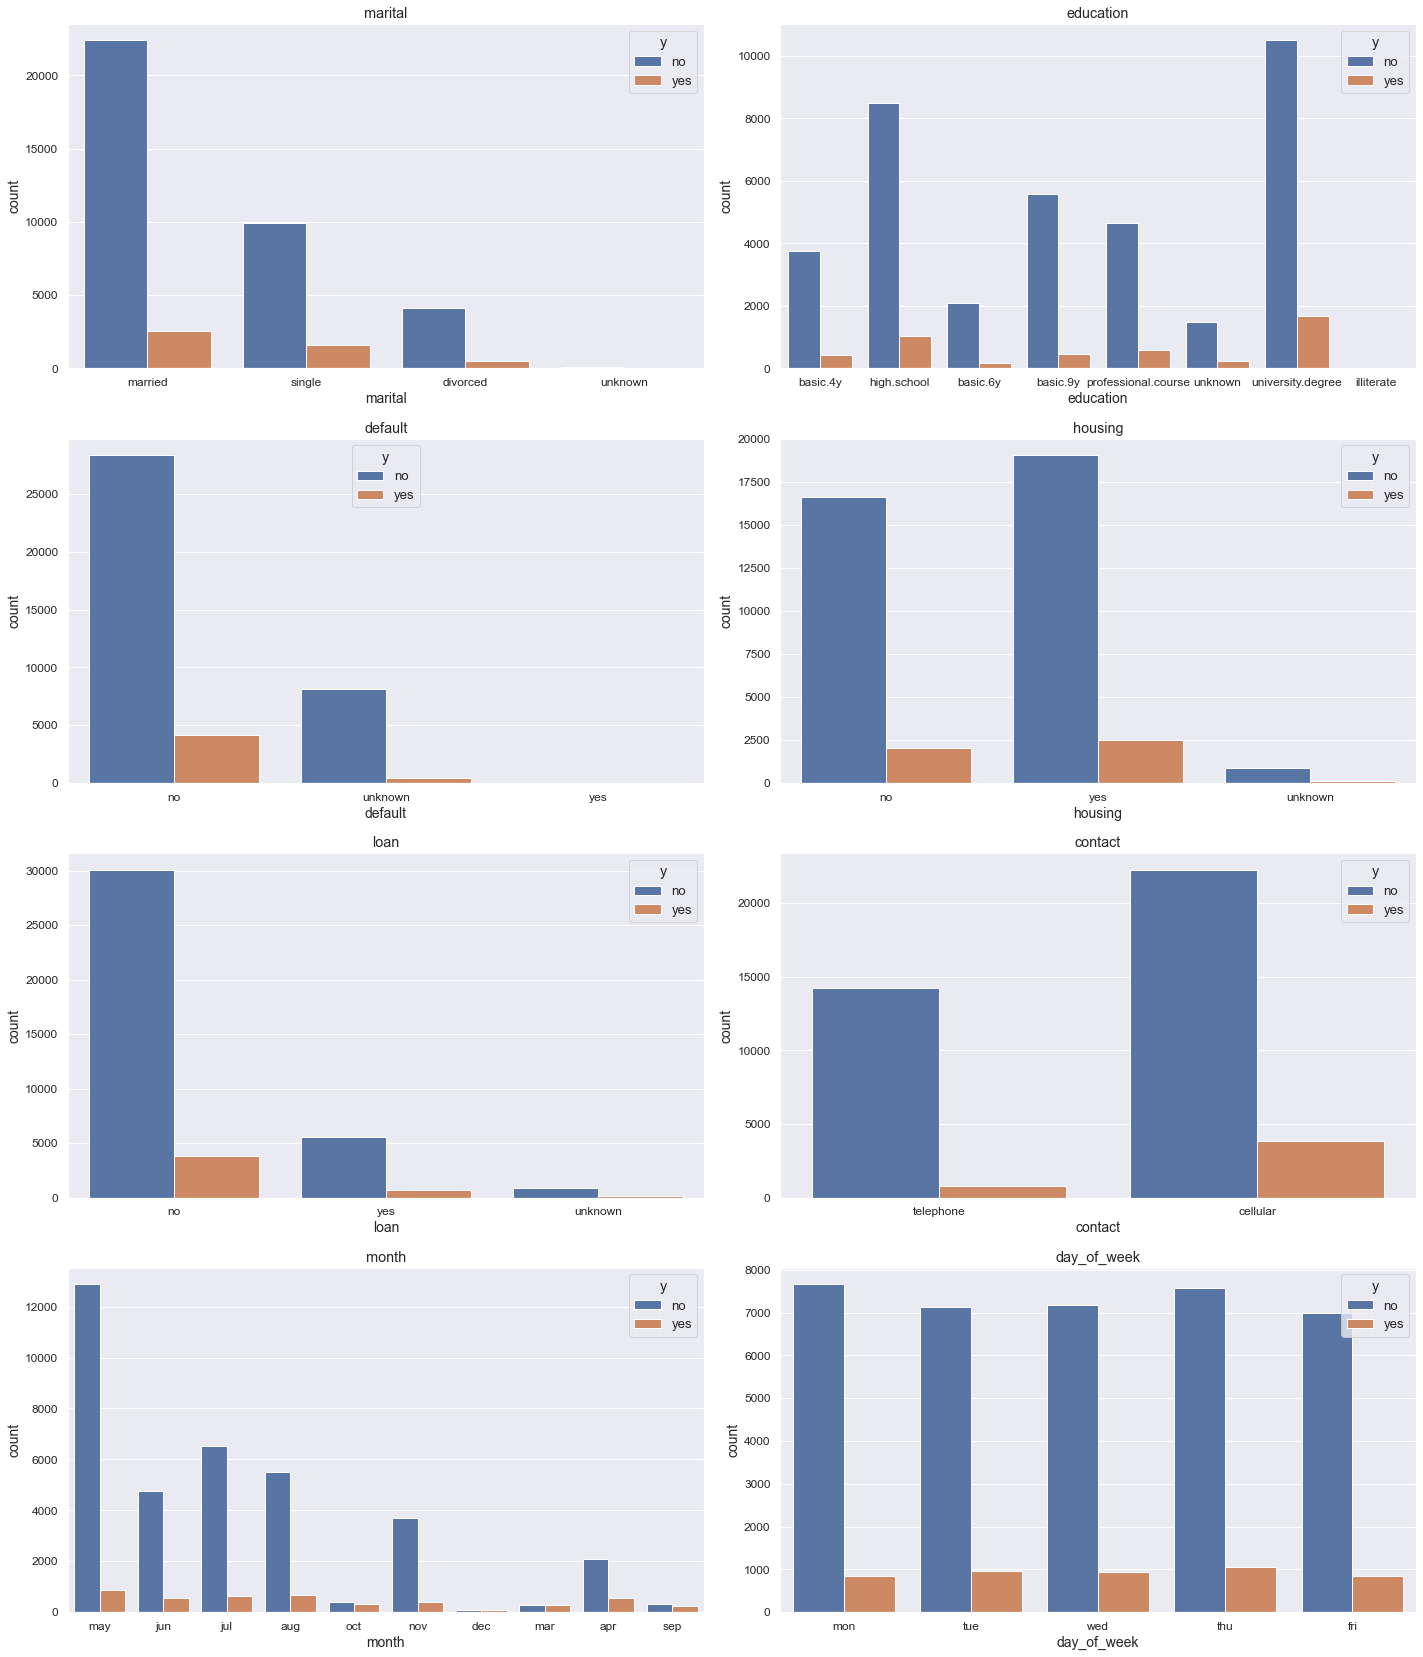

In [16]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,2,1)
plt.title("marital")
sns.countplot(df.marital, hue=df.y)

plt.subplot(7,2,2)
plt.title("education")
sns.countplot(df.education, hue=df.y)

plt.subplot(7,2,3)
plt.title("default")
sns.countplot(df.default, hue=df.y)

plt.subplot(7,2,4)
plt.title("housing")
sns.countplot(df.housing, hue=df.y)

plt.subplot(7,2,5)
plt.title("loan")
sns.countplot(df.loan, hue=df.y)

plt.subplot(7,2,6)
plt.title("contact")
sns.countplot(df.contact, hue=df.y)

plt.subplot(7,2,7)
plt.title("month")
sns.countplot(df.month, hue=df.y)

plt.subplot(7,2,8)
plt.title("day_of_week")
sns.countplot(df.day_of_week, hue=df.y)


plt.tight_layout()
plt.show()

### Correlation

In [17]:
df.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.00,-0.00,0.00,-0.03,0.02,-0.00,0.00,0.13,0.01,-0.02
duration,-0.00,1.00,-0.07,-0.05,0.02,-0.03,0.01,-0.01,-0.03,-0.04
campaign,0.00,-0.07,1.00,0.05,-0.08,0.15,0.13,-0.01,0.14,0.14
pdays,-0.03,-0.05,0.05,1.00,-0.59,0.27,0.08,-0.09,0.30,0.37
previous,0.02,0.02,-0.08,-0.59,1.00,-0.42,-0.20,-0.05,-0.45,-0.50
emp.var.rate,-0.00,-0.03,0.15,0.27,-0.42,1.00,0.78,0.20,0.97,0.91
cons.price.idx,0.00,0.01,0.13,0.08,-0.20,0.78,1.00,0.06,0.69,0.52
cons.conf.idx,0.13,-0.01,-0.01,-0.09,-0.05,0.20,0.06,1.00,0.28,0.10
euribor3m,0.01,-0.03,0.14,0.30,-0.45,0.97,0.69,0.28,1.00,0.95
nr.employed,-0.02,-0.04,0.14,0.37,-0.50,0.91,0.52,0.10,0.95,1.00


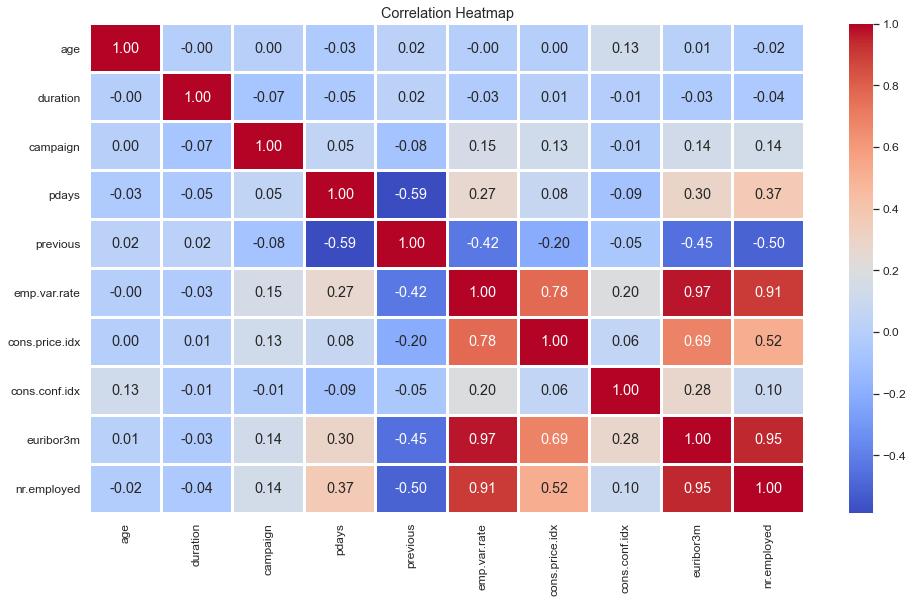

In [18]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.title("Correlation Heatmap")
plt.show()

### Pairplots

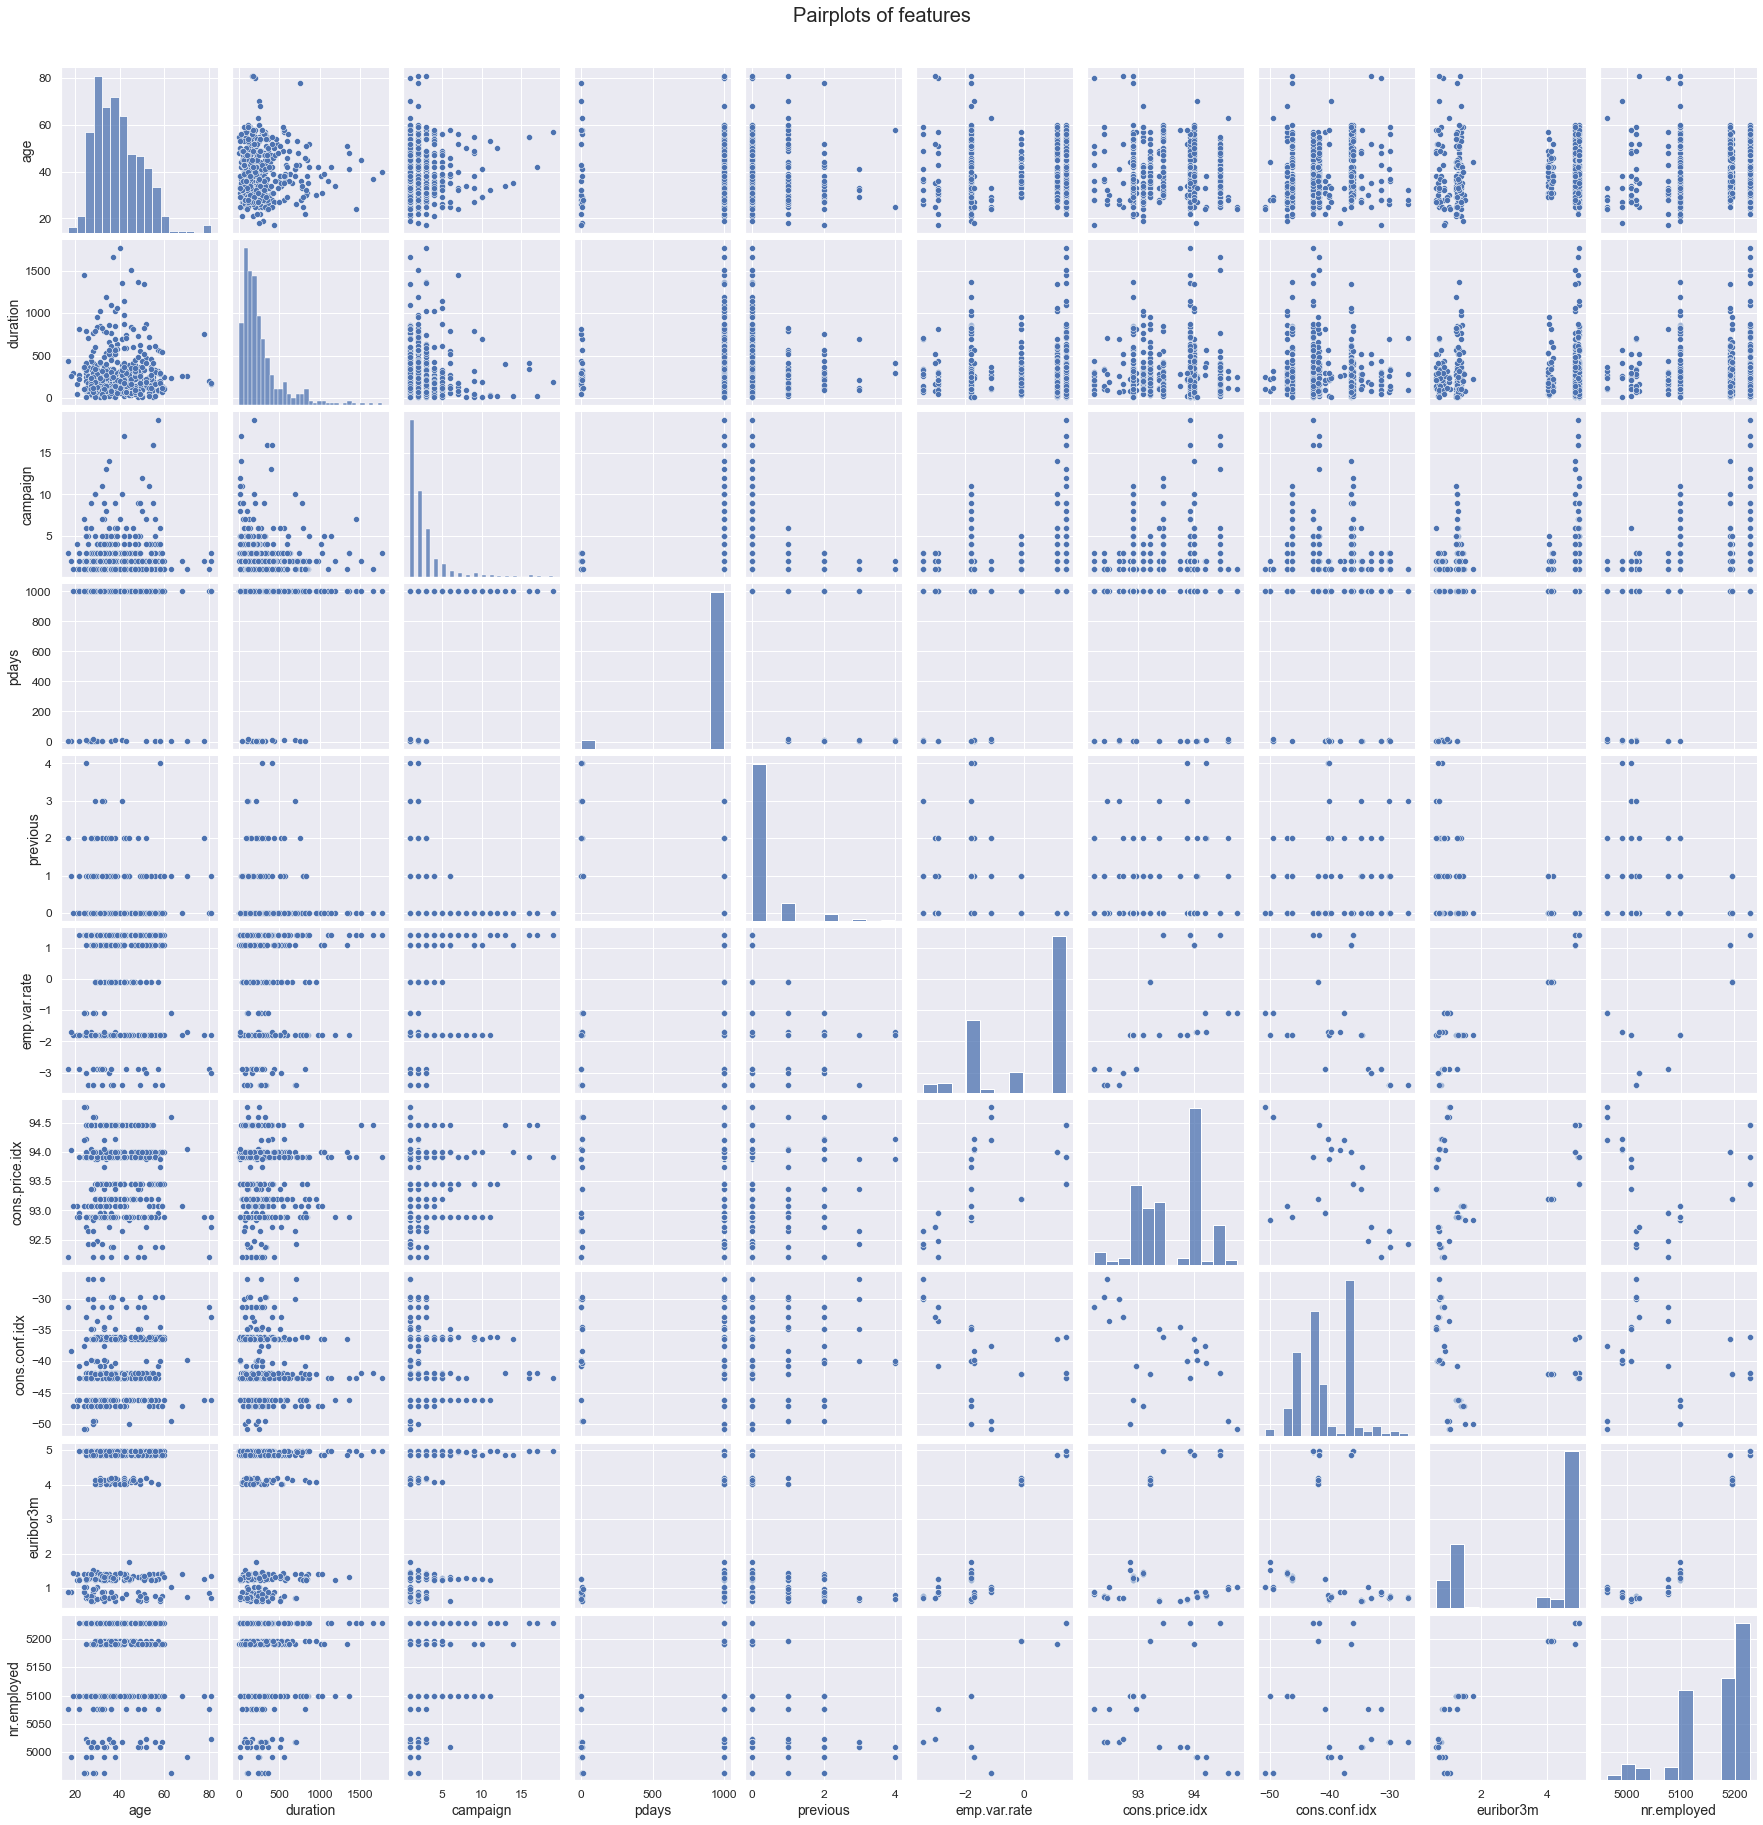

In [19]:
sns.pairplot(df.sample(500))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize=20)
plt.show()

## Data Preprocessing

### Drop unwanted features

In [20]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype='object')

In [21]:
df.drop(['contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m'], axis=1, inplace=True)

In [22]:
df

,age,job,marital,education,default,housing,loan,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,5191.00,no
1,57,services,married,high.school,unknown,no,no,5191.00,no
2,37,services,married,high.school,no,yes,no,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,5191.00,no
4,56,services,married,high.school,no,no,yes,5191.00,no
...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,4963.60,yes
41184,46,blue-collar,married,professional.course,no,no,no,4963.60,no
41185,56,retired,married,university.degree,no,yes,no,4963.60,no
41186,44,technician,married,professional.course,no,no,no,4963.60,yes


### Treat Missing Values

In [23]:
df.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
nr.employed    0
y              0
dtype: int64

### Treat Duplicate Values

In [24]:
df.duplicated(keep='first').sum()

17550

In [25]:
df[df.duplicated(keep=False)] #Check duplicate values

,age,job,marital,education,default,housing,loan,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,5191.00,no
2,37,services,married,high.school,no,yes,no,5191.00,no
6,59,admin.,married,professional.course,no,no,no,5191.00,no
7,41,blue-collar,married,unknown,unknown,no,no,5191.00,no
9,25,services,single,high.school,no,yes,no,5191.00,no
...,...,...,...,...,...,...,...,...,...
41163,35,technician,divorced,basic.4y,no,yes,no,4963.60,yes
41172,31,admin.,single,university.degree,no,yes,no,4963.60,yes
41173,62,retired,married,university.degree,no,yes,no,4963.60,yes
41174,62,retired,married,university.degree,no,yes,no,4963.60,yes


In [26]:
df.drop_duplicates(inplace=True)

In [27]:
df

,age,job,marital,education,default,housing,loan,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,5191.00,no
1,57,services,married,high.school,unknown,no,no,5191.00,no
2,37,services,married,high.school,no,yes,no,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,5191.00,no
4,56,services,married,high.school,no,no,yes,5191.00,no
...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,4963.60,yes
41184,46,blue-collar,married,professional.course,no,no,no,4963.60,no
41185,56,retired,married,university.degree,no,yes,no,4963.60,no
41186,44,technician,married,professional.course,no,no,no,4963.60,yes


In [28]:
df.reset_index(inplace=True, drop=True)

In [29]:
df

,age,job,marital,education,default,housing,loan,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,5191.00,no
1,57,services,married,high.school,unknown,no,no,5191.00,no
2,37,services,married,high.school,no,yes,no,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,5191.00,no
4,56,services,married,high.school,no,no,yes,5191.00,no
...,...,...,...,...,...,...,...,...,...
23633,73,retired,married,professional.course,no,yes,no,4963.60,yes
23634,46,blue-collar,married,professional.course,no,no,no,4963.60,no
23635,56,retired,married,university.degree,no,yes,no,4963.60,no
23636,44,technician,married,professional.course,no,no,no,4963.60,yes


### Perform One-Hot Encoding

In [30]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'nr.employed', 'y'], dtype='object')

In [31]:
df_cat = df[['job', 'marital', 'education', 'default', 'housing', 'loan']]

In [32]:
df_num = df[['age','nr.employed', 'y']]

In [33]:
df_cat2 = pd.get_dummies(df_cat, drop_first=True)

In [34]:
df_cat2 

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes
0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23633,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
23634,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
23635,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
23636,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [35]:
df3 = pd.concat([df_cat2,df_num],axis=1)

In [36]:
df3

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,age,nr.employed,y
0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56,5191.00,no
1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,57,5191.00,no
2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,37,5191.00,no
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,40,5191.00,no
4,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,56,5191.00,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23633,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,73,4963.60,yes
23634,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,46,4963.60,no
23635,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,56,4963.60,no
23636,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,44,4963.60,yes


In [37]:
le =  LabelEncoder()

In [38]:
df3['y'] = le.fit_transform(df3['y'])

In [39]:
df3

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,age,nr.employed,y
0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56,5191.00,0
1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,57,5191.00,0
2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,37,5191.00,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,40,5191.00,0
4,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,56,5191.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23633,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,73,4963.60,1
23634,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,46,4963.60,0
23635,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,56,4963.60,0
23636,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,44,4963.60,1


In [40]:
df3.y.value_counts()

0    19658
1     3980
Name: y, dtype: int64

### Create and save processed dataset

In [41]:
df3.to_csv("bankfinal.csv",index=False)

### Train Test Split

In [42]:
df3.shape

(23638, 30)

In [43]:
X = df3.iloc[:,0:29]
y = df3.iloc[:,29]

### Treat Imbalance Data

In [44]:
y.value_counts()

0    19658
1     3980
Name: y, dtype: int64

In [45]:
ros = RandomUnderSampler(sampling_strategy='auto',random_state=0)

In [46]:
new_X, new_y = ros.fit_resample(X, y)

In [47]:
new_y.value_counts()

1    3980
0    3980
Name: y, dtype: int64

In [48]:
new_X

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,age,nr.employed
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,51,5228.10
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,58,5099.10
2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,31,5099.10
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,27,5076.20
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,41,5228.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7955,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,33,4963.60
7956,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,62,4963.60
7957,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,62,4963.60
7958,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,73,4963.60


### Train Test Split Cont'd

In [49]:
X.values, y.values

(array([[   0. ,    0. ,    1. , ...,    0. ,   56. , 5191. ],
        [   0. ,    0. ,    0. , ...,    0. ,   57. , 5191. ],
        [   0. ,    0. ,    0. , ...,    0. ,   37. , 5191. ],
        ...,
        [   0. ,    0. ,    0. , ...,    0. ,   56. , 4963.6],
        [   0. ,    0. ,    0. , ...,    0. ,   44. , 4963.6],
        [   0. ,    0. ,    0. , ...,    0. ,   74. , 4963.6]]),
 array([0, 0, 0, ..., 0, 1, 0]))

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [51]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18910, 29), (4728, 29), (18910,), (4728,))

### Feature Scaling

In [52]:
X_train

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,age,nr.employed
21286,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,88,5017.50
12223,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,31,5228.10
20584,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,24,5076.20
15965,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,46,5099.10
16454,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,44,5099.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,40,5195.80
19648,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,37,5076.20
9845,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,54,5228.10
10799,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,48,5228.10


In [53]:
scaler = StandardScaler()

In [54]:
X_train_scaled = scaler.fit_transform(X_train)

In [55]:
X_test_scaled = scaler.transform(X_test)

In [56]:
X_train_scaled

array([[-0.50222998, -0.22639875, -0.19165713, ..., -0.51318792,
         4.17600905, -1.77687132],
       [-0.50222998, -0.22639875, -0.19165713, ...,  1.94860394,
        -0.91738451,  0.93248166],
       [-0.50222998, -0.22639875, -0.19165713, ..., -0.51318792,
        -1.54288898, -1.02170029],
       ...,
       [-0.50222998, -0.22639875, -0.19165713, ..., -0.51318792,
         1.13784447,  0.93248166],
       [-0.50222998, -0.22639875, -0.19165713, ..., -0.51318792,
         0.60169778,  0.93248166],
       [-0.50222998, -0.22639875, -0.19165713, ..., -0.51318792,
        -0.20252225,  0.45519299]])

In [57]:
X_test_scaled

array([[-0.50222998, -0.22639875, -0.19165713, ...,  1.94860394,
        -0.29188003, -1.69968178],
       [-0.50222998, -0.22639875, -0.19165713, ..., -0.51318792,
        -0.64931116,  0.93248166],
       [-0.50222998, -0.22639875, -0.19165713, ..., -0.51318792,
        -0.20252225,  0.51694462],
       ...,
       [-0.50222998, -0.22639875, -0.19165713, ..., -0.51318792,
         1.67399116,  0.93248166],
       [ 1.99111969, -0.22639875, -0.19165713, ..., -0.51318792,
        -0.11316447,  0.51694462],
       [-0.50222998, -0.22639875, -0.19165713, ..., -0.51318792,
         0.86977113, -2.11007285]])

### Model Training

### Using PyCaret

In [58]:
exp_class = setup(data = df3, target = 'y', session_id=0, normalize=True, train_size=0.8) 

,Description,Value
0,session_id,0
1,Target,y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(23638, 30)"
5,Missing Values,False
6,Numeric Features,29
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [59]:
compare_models(exclude=['catboost','lightgbm','lda','qda','mlp','ada','nb','ridge','rbfsvm','svm'],fold=5) #For Classifier

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8326,0.7616,0.1608,0.5012,0.2429,0.1756,0.2123,0.7300
lr,Logistic Regression,0.8324,0.7430,0.1206,0.4969,0.1938,0.1372,0.1812,1.1580
xgboost,Extreme Gradient Boosting,0.8230,0.7330,0.1817,0.4306,0.2555,0.1734,0.1944,1.4700
knn,K Neighbors Classifier,0.8121,0.6591,0.1906,0.3766,0.2530,0.1586,0.1707,0.8680
rf,Random Forest Classifier,0.7698,0.6337,0.1880,0.2493,0.2143,0.0826,0.0837,0.7620
et,Extra Trees Classifier,0.7524,0.5286,0.2001,0.2267,0.2125,0.0663,0.0665,1.0000
dt,Decision Tree Classifier,0.7298,0.5217,0.2051,0.1996,0.2023,0.0397,0.0397,0.0580


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [60]:
cat = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8228,0.7615,0.1424,0.4128,0.2118,0.1379,0.1629
1,0.8355,0.7408,0.1582,0.5263,0.2433,0.1800,0.2214
2,0.8324,0.7430,0.1741,0.4955,0.2576,0.1870,0.2198
3,0.8345,0.7638,0.1709,0.5143,0.2565,0.1889,0.2256
4,0.8419,0.7915,0.1804,0.5876,0.2760,0.2144,0.2621
5,0.8429,0.7765,0.1646,0.6118,0.2594,0.2029,0.2586
6,0.8318,0.7520,0.1614,0.4904,0.2429,0.1745,0.2090
7,0.8355,0.7950,0.1804,0.5229,0.2682,0.1996,0.2359
8,0.8324,0.7584,0.1456,0.4946,0.2249,0.1612,0.1997
9,0.8308,0.7430,0.1619,0.4766,0.2417,0.1717,0.2038


In [61]:
print(cat)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


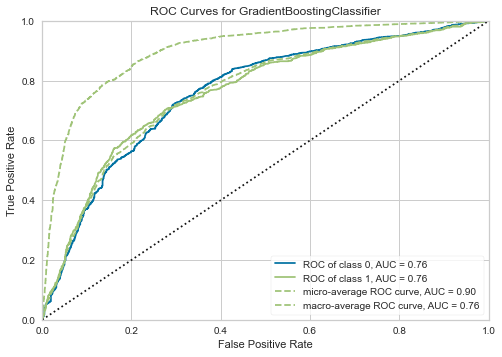

In [62]:
plot_model(cat)

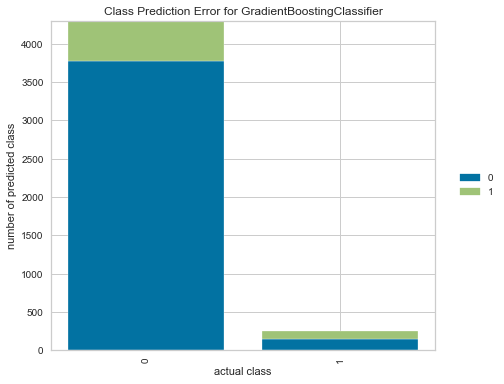

In [63]:
plot_model(cat, plot = 'error')

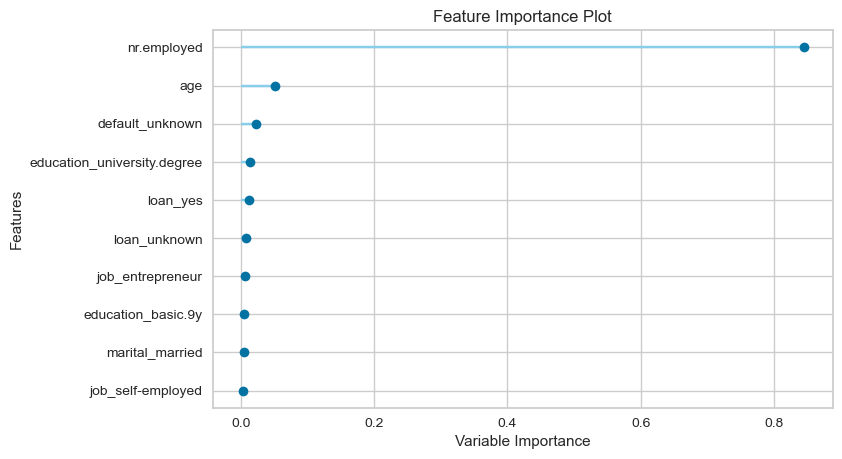

In [64]:
plot_model(cat, plot='feature')

In [65]:
evaluate_model(cat)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [66]:
predict_model(cat)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8213,0.7624,0.1413,0.4531,0.2154,0.1448,0.1765


,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,default_unknown,default_yes,housing_yes,loan_unknown,loan_yes,age,nr.employed,y,Label,Score
0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,-0.29,-1.70,1,0,0.63
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,-0.65,0.93,0,0,0.86
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,-0.20,0.52,1,0,0.90
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,-0.92,0.93,0,0,0.91
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,1.23,0.93,0,0,0.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4723,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,-1.01,-0.73,0,0,0.69
4724,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2.03,-2.11,1,1,0.58
4725,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1.67,0.93,0,0,0.88
4726,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,-0.11,0.52,0,0,0.91


In [67]:
final_lightgbm = finalize_model(cat)

#### Python code done by Dennis Lam